# 🧠 Fake News Detection Using TF-IDF + Machine Learning
Complete end-to-end notebook with data loading, preprocessing, training, saving, and interactive testing.

In [1]:
import pandas as pd
import numpy as np
import re, os, joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

df = pd.read_csv(r"C:\Users\asus\Downloads\datasets\final_dataset.csv")

print("✅ Columns:", df.columns.tolist())
df.head()



✅ Columns: ['text', 'label_raw', 'label']


,text,label_raw,label
0,read former fbi director james comey s full st...,fake,fake
1,trump is not your traditional republican candi...,fake,fake
2,first hand account of a crazy liberal attackin...,fake,fake
3,if you watch cnbc at all you know john harwood...,fake,fake
4,republican presidential hopeful ted cruz stunn...,fake,fake


In [24]:
# Data Cleaning 

import pandas as pd

# Loads the dataset
df = pd.read_csv(r"C:\Users\asus\Downloads\datasets\final_dataset.csv")

df['title'] = df['text'].str.split('.').str[0]  # take first sentence as pseudo-title

df = df[['title', 'text', 'label']].copy()

df.dropna(inplace=True)

df['label'] = df['label'].astype(str).str.lower()

print("✅ Cleaned dataset shape:", df.shape)
print("📰 Sample rows:")
df.head(3)


✅ Cleaned dataset shape: (35145, 3)
📰 Sample rows:


,title,text,label
0,read former fbi director james comey s full st...,read former fbi director james comey s full st...,fake
1,trump is not your traditional republican candi...,trump is not your traditional republican candi...,fake
2,first hand account of a crazy liberal attackin...,first hand account of a crazy liberal attackin...,fake



Training Logistic Regression...
Logistic Regression Accuracy: 0.9839

Training Naive Bayes...
Naive Bayes Accuracy: 0.9496

Training Linear SVM...
Linear SVM Accuracy: 0.9917

Training Random Forest...
Random Forest Accuracy: 0.9926

✅ Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      3530
        real       0.99      0.99      0.99      3499

    accuracy                           0.99      7029
   macro avg       0.99      0.99      0.99      7029
weighted avg       0.99      0.99      0.99      7029



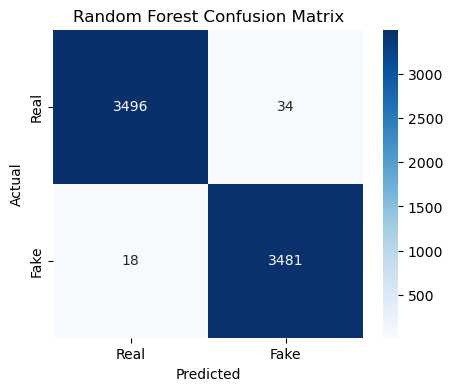

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=50000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    results[name] = acc

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\n✅ Best Model:", best_model_name)
print("\nClassification Report:")
print(classification_report(y_test, best_model.predict(X_test_tfidf)))

cm = confusion_matrix(y_test, best_model.predict(X_test_tfidf))
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real","Fake"], yticklabels=["Real","Fake"])
plt.title(f"{best_model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
import joblib

# Saves our model and vectorizer
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [14]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=300)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9839

Training Naive Bayes...
Naive Bayes Accuracy: 0.9496

Training Linear SVM...
Linear SVM Accuracy: 0.9917

Training Random Forest...
Random Forest Accuracy: 0.9926

✅ Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      3530
        Fake       0.99      0.99      0.99      3499

    accuracy                           0.99      7029
   macro avg       0.99      0.99      0.99      7029
weighted avg       0.99      0.99      0.99      7029



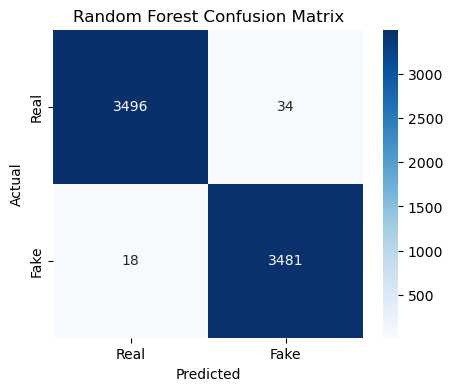

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splits our dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=50000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Trying our multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    results[name] = acc

# Pick best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\n✅ Best Model:", best_model_name)
y_pred = best_model.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real","Fake"], yticklabels=["Real","Fake"])
plt.title(f"{best_model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
import joblib

# Save the best trained model and vectorizer
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


Accuracy: 0.9846350832266325
              precision    recall  f1-score   support

        fake       0.99      0.98      0.98      3514
        real       0.98      0.99      0.98      3515

    accuracy                           0.98      7029
   macro avg       0.98      0.98      0.98      7029
weighted avg       0.98      0.98      0.98      7029



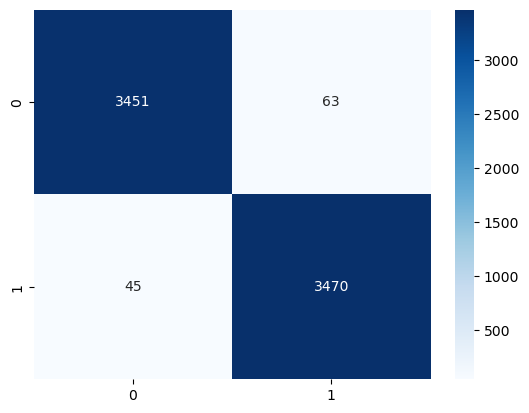

In [15]:
y_pred = model.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [16]:
save_dir = r'C:\Users\asus\Downloads\datasets'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(model, os.path.join(save_dir, 'best_model.joblib'))
joblib.dump(vectorizer, os.path.join(save_dir, 'vectorizer.joblib'))
print('✅ Model saved successfully')

✅ Model saved successfully


In [ ]:
import joblib
import numpy as np

# Load saved model and vectorizer
model = joblib.load("best_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

THRESHOLD = 0.6  # below 60% → mark as UNSURE

print("✅ Real-Time Fake News Detector Ready!")
print("Type 'exit' anytime to quit.\n")

while True:
    headline = input("Enter a news headline: ")
    if headline.lower() == "exit":
        break

    article = input("Enter article details (or press Enter to skip): ")

    combined_text = headline + " " + (article * 3)
    X_input = vectorizer.transform([combined_text])
    probabilities = model.predict_proba(X_input)[0]
    pred_index = np.argmax(probabilities)
    confidence = probabilities[pred_index] * 100
    label_names = model.classes_
    predicted_label = label_names[pred_index]

    if predicted_label.lower() == "fake":
        status = f"FAKE ({confidence:.2f}% confidence)"
    else:
        status = f"REAL ({confidence:.2f}% confidence)"

    if confidence < THRESHOLD * 100:
        status = f"UNSURE / NEEDS VERIFICATION ({confidence:.2f}% confidence)"

    print("\n📰 Headline:", headline)
    if article.strip():
        print("📄 Article snippet:", article[:200].strip() + ("..." if len(article) > 200 else ""))
    print(f"🔎 Prediction: {status}")
    print("-" * 70)


✅ Real-Time Fake News Detector Ready!
Type 'exit' anytime to quit.



In [ ]:
while True:
    headline = input('Enter headline (or exit): ').strip()
    if headline.lower() == 'exit':
        print('👋 Exiting.')
        break
    article = input('Enter article (optional): ').strip()
    predict_news(headline, article)